In [4]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import os
import warnings

warnings.filterwarnings("ignore") 

plt.style.use('fivethirtyeight') 

In [7]:
#Import Data 
#Create path 
path = R'/Users/shaquillelee/Documents/Task 6.1'
#Import data 
ufc_data = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'UFC_data_filled.csv'), index_col = 0)


In [9]:
pd.set_option('display.max_columns', None)
ufc_data.head()

,Referee,date,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,B_avg_opp_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_avg_TD_att,B_avg_TD_landed,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_BODY_att,B_avg_BODY_landed,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_LEG_att,B_avg_LEG_landed,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_CTRL_time(seconds),B_avg_opp_CTRL_time(seconds),B_total_time_fought(seconds),B_total_rounds_fought,B_total_title_bouts,B_current_win_streak,B_current_lose_streak,B_longest_win_streak,B_wins,B_losses,B_draw,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_avg_KD,R_avg_opp_KD,R_avg_SIG_STR_pct,R_avg_opp_SIG_STR_pct,R_avg_TD_pct,R_avg_opp_TD_pct,R_avg_SUB_ATT,R_avg_opp_SUB_ATT,R_avg_REV,R_avg_opp_REV,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_avg_TD_att,R_avg_TD_landed,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_BODY_att,R_avg_BODY_landed,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_LEG_att,R_avg_LEG_landed,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_CTRL_time(seconds),R_avg_opp_CTRL_time(seconds),R_total_time_fought(seconds),R_total_rounds_fought,R_total_title_bouts,R_current_win_streak,R_current_lose_streak,R_longest_win_streak,R_wins,R_losses,R_draw,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Chris Tognoni,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Bantamweight,0.000,0.0,0.420000,0.49500,0.330,0.36000,0.500,1.0000,0.00,0.0,50.0000,20.0000,84.000,45.0000,76.5000,41.000,114.000,64.00,1.500,1.0,9.0,6.500,39.500,11.000,63.0000,27.500,7.5000,7.0000,12.0000,9.0000,3.000,2.000,9.000,8.500,35.0000,12.5,43.5000,17.5000,10.5000,4.5000,4.0000,3.00,4.5000,3.000,36.50,24.50,34.00,277.5000,531.5,4,0,0,1,1,1,1,0,0,0,0,0,1,0,Orthodox,165.10,170.18,135.0,1.000000,0.000000,0.500000,0.460000,0.000000,0.00000,0.000000,0.00000,0.00000,0.00,34.000000,17.000000,13.00000,6.000000,35.000000,18.000000,16.000000,9.000000,0.000000,0.000000,3.000000,0.000000,32.00000,15.000000,11.000000,5.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,33.000000,16.000000,12.000000,6.000000,1.000000,1.000000,1.0000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,54.000000,166.000000,1,0,1,0,1,1,0,0,0,0,0,1,0,0,Orthodox,170.18,177.80,135.0,31.0,27.0
1,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Middleweight,0.500,0.0,0.660000,0.30500,0.300,0.50000,1.500,0.0000,0.00,0.0,65.5000,35.0000,50.000,16.5000,113.5000,68.500,68.500,29.00,2.500,1.5,0.5,0.500,46.000,20.000,36.0000,7.500,12.0000,8.0000,8.0000,3.0000,7.500,7.000,6.000,6.000,58.0000,30.0,48.0000,15.5000,0.5000,0.5000,0.5000,0.50,7.0000,4.500,1.50,0.50,219.50,24.5000,577.5,4,0,2,0,2,2,0,0,0,1,0,1,0,0,Ort

In [10]:
ufc_data.shape

(6012, 142)

In [11]:
type(ufc_data)

pandas.core.frame.DataFrame

# 2. Create a subset 

In [68]:
#Create a subset for desired columns 
ufc_sub = ufc_data[['date', 'B_avg_TD_att']]

In [69]:
ufc_sub.head()

,date,B_avg_TD_att
0,2021-03-20,1.500
1,2021-03-20,2.500
2,2021-03-20,0.000
3,2021-03-20,0.000
4,2021-03-20,5.375


In [70]:
ufc_sub = ufc_sub.loc[(ufc_sub['date'] >= '1995-01-01') & (ufc_sub['date'] < '2021-06-01')]

In [71]:
# Set the "date" column as the index

from datetime import datetime

ufc_sub['datetime'] = pd.to_datetime(ufc_sub['date']) # Create a datetime column from "Date.""
ufc_sub = ufc_sub.set_index('datetime') # Set the datetime as the index of the dataframe.
ufc_sub.drop(['date'], axis=1, inplace=True) # Drop the "Date" column.
ufc_sub.head()

,B_avg_TD_att
datetime,
2021-03-20,1.500
2021-03-20,2.500
2021-03-20,0.000
2021-03-20,0.000
2021-03-20,5.375


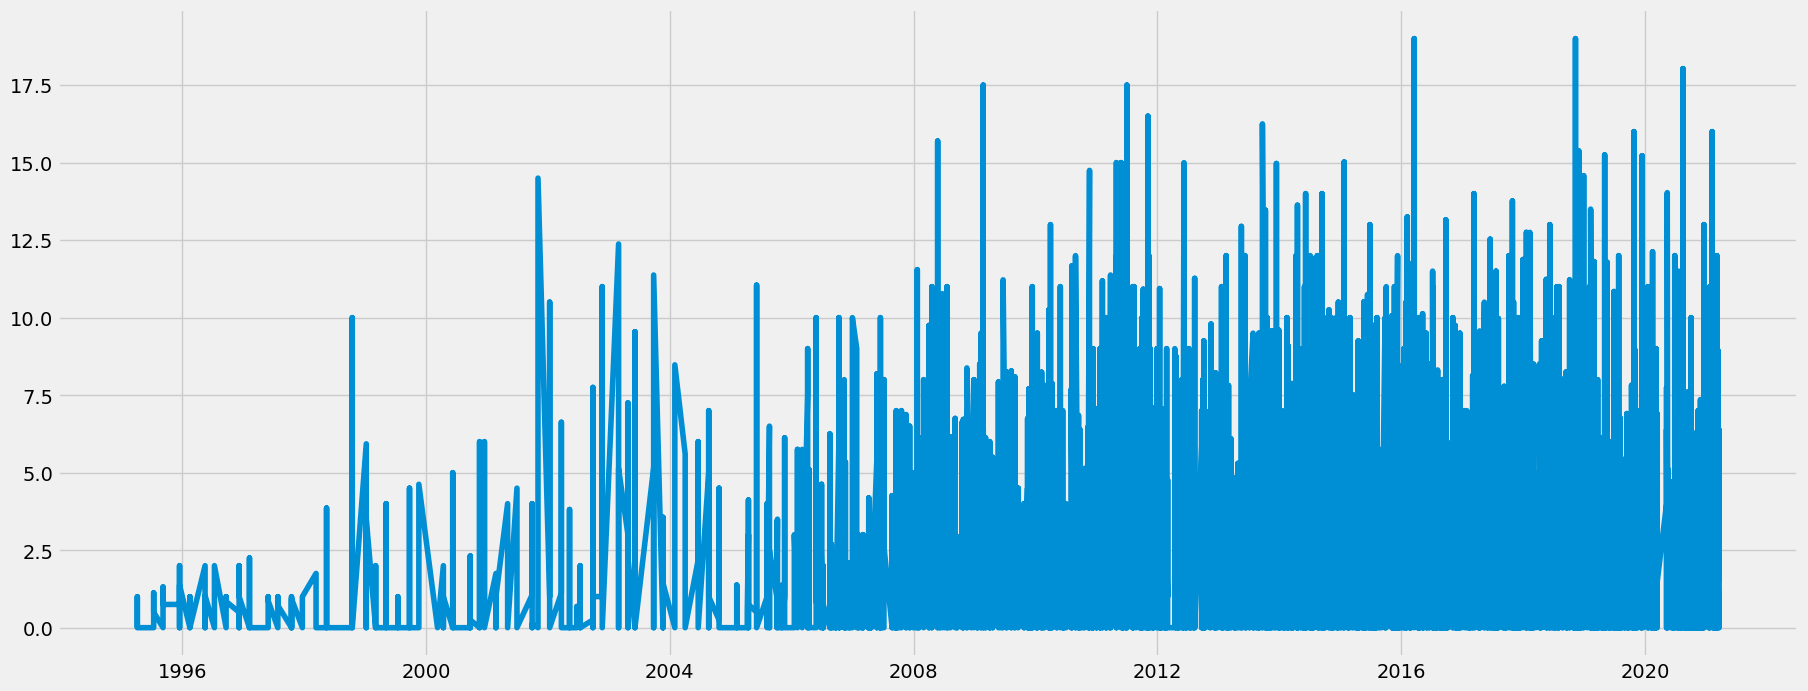

In [72]:
# Plot the new data set

plt.figure(figsize=(20,8), dpi=100)
plt.plot(ufc_sub)

The general trend appears to be an increase in the frequency or magnitude Take Down attempts from 1995 through to 2022. The data shows a steady rise in activity, particularly after 2000, with the highest and most consistent activity occurring in the later years (2010-2022).This mean in earlier times in UFC, fighters would usually fight while standing up. Over the years, other fight styles have emerged which consists of more take downs. 

# 3. Decomposing

In [84]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(ufc_sub, model='additive', period = 12)

In [80]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

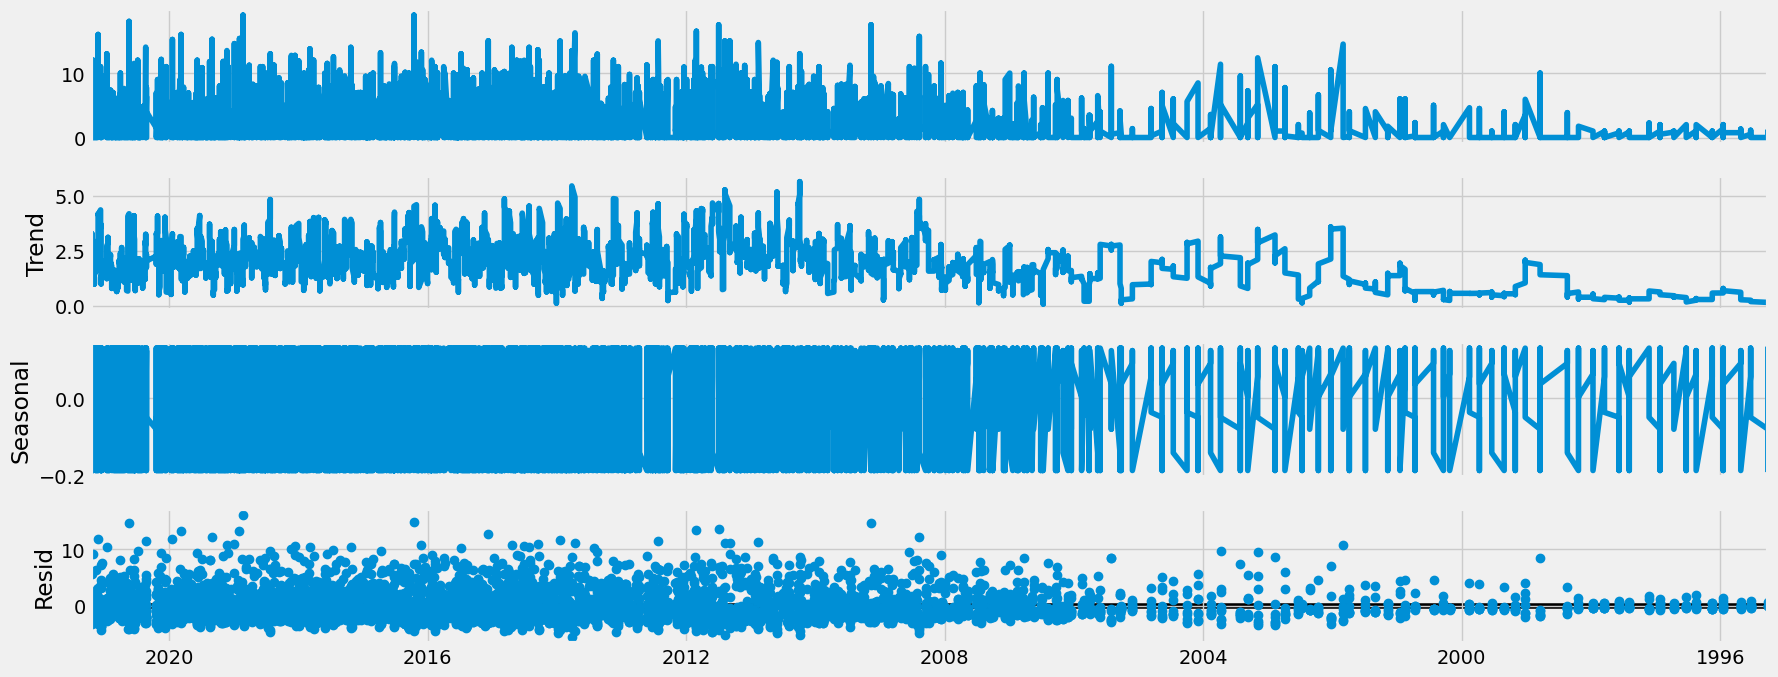

In [81]:
# Plot the separate components

decomposition.plot()
plt.show()

This analysis suggests that the time series is driven more by long-term trends rather than seasonal patterns. If seasonality were more pronounced, you would expect to see clearer oscillations in the seasonal component. The residuals don’t show any obvious structure, which implies that the model has effectively captured the main features of the time series.

#### 

In [87]:

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(ufc_sub['B_avg_TD_att'])

Dickey-Fuller Stationarity test:
Test Statistic                  -26.320665
p-value                           0.000000
Number of Lags Used               6.000000
Number of Observations Used    5976.000000
Critical Value (1%)              -3.431445
Critical Value (5%)              -2.862024
Critical Value (10%)             -2.567028
dtype: float64


#####  Interpretation
Given the test statistic of -26.320665, which is far below the critical value of -3.431445 at the 1% significance level, and the p-value of 0.000000, we have very strong evidence to reject the null hypothesis of non-stationarity. This indicates that the time series is stationary.

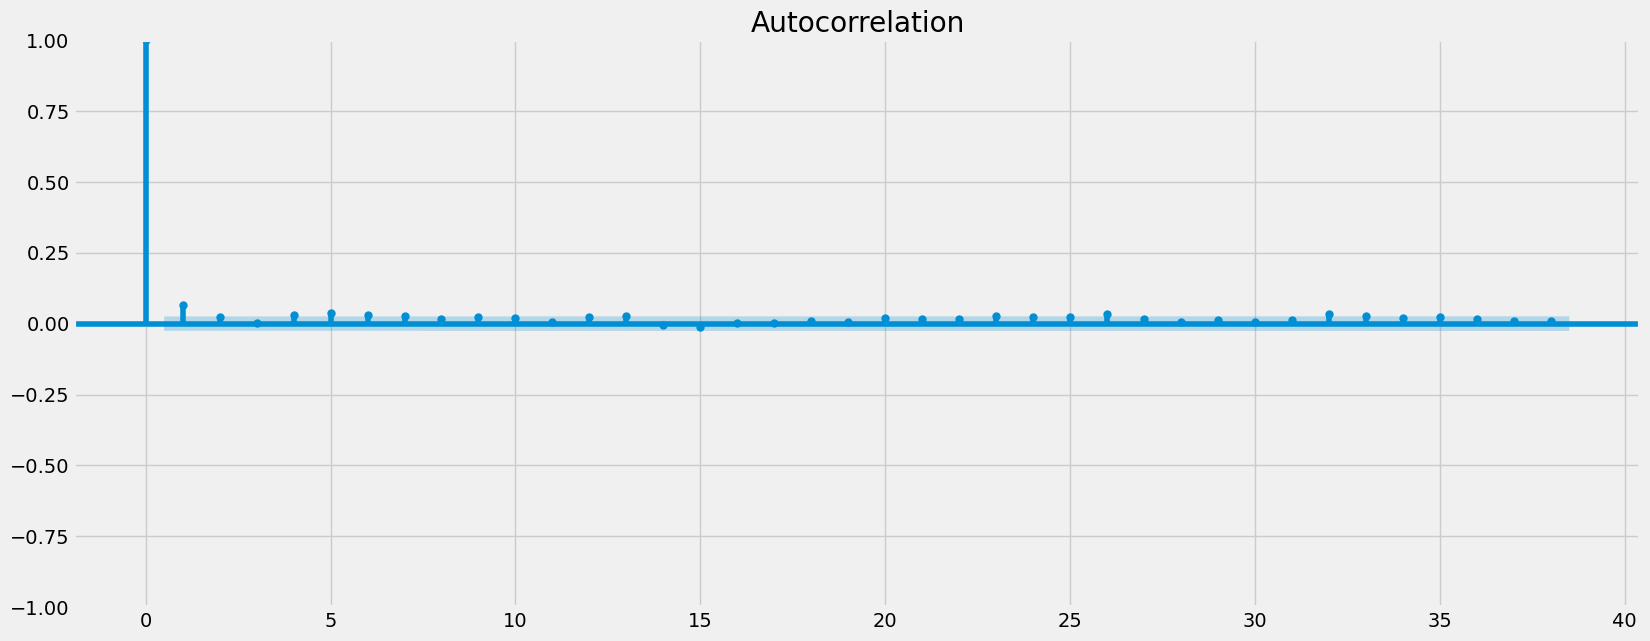

In [91]:
# Check out a plot of autocorrelations
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots\n",

plot_acf(ufc_sub)
plt.show()